### Greedy Algorithms

In [5]:
class Item(object):
    def __init__(self, n, v, w):
        self.name = n
        self.value = v
        self.weight = w
    def getName(self):
        return self.name
    def getValue(self):
        return self.value
    def getWeight(self):
        return self.weight
    def __str__(self):
        res = '<'+self.name+', '+str(self.value)+', '+str(self.weight)+'>'
        return res
    
def value(item):
    return item.getValue()
def weightInverse(item):
    return 1.0 / item.getWeight()
def density(item):
    return item.getValue()/item.getWeight()
def buildItems():
    names = ['clock','painting','radio','vase','book','computer']
    vals = [175,90,20,50,10,200]
    weights = [10,9,4,2,1,20]
    Items = []
    for i in range(len(vals)):
        Items.append(Item(names[i],vals[i],weights[i]))
    return Items
def greedy(Items, maxWeight, keyFcn):
    assert type(Items) == list and maxWeight >= 0
    ItemsCopy = sorted(Items, key=keyFcn, reverse=True)
    result = []
    totalVal = 0.0
    totalWeight = 0.0
    i = 0
    while totalWeight < maxWeight and i < len(Items):
        if(totalWeight+ItemsCopy[i].getWeight()) <= maxWeight:
            result.append(ItemsCopy[i])
            totalWeight += ItemsCopy[i].getWeight()
            totalVal += ItemsCopy[i].getValue()
        i += 1
    return (result,totalVal)
def testGreedy(Items, constraint, getKey):
    taken, val = greedy(Items, constraint, getKey)
    print('Total value of items taken = ', str(val))
    for item in taken:
        print(' ',item)

In [6]:
maxWeight = 20
Items = buildItems()
print('Use greedy by value for knapsack of size maxWeight')
testGreedy(Items, maxWeight, value)
print('Use greedy by weight to fill knapsack of size maxWeight')
testGreedy(Items,maxWeight,weightInverse)
print('Use greedy by density for knapsack of size maxWeight')
testGreedy(Items, maxWeight, density)

Use greedy by value for knapsack of size maxWeight
Total value of items taken =  200.0
  <computer, 200, 20>
Use greedy by weight to fill knapsack of size maxWeight
Total value of items taken =  170.0
  <book, 10, 1>
  <vase, 50, 2>
  <radio, 20, 4>
  <painting, 90, 9>
Use greedy by density for knapsack of size maxWeight
Total value of items taken =  255.0
  <vase, 50, 2>
  <clock, 175, 10>
  <book, 10, 1>
  <radio, 20, 4>


In [128]:
#From codereview.stackexchange.com                    
def partitions(set_):
    if not set_:
        yield []
        return
    for i in range(2**len(set_)//2):
        parts = [set(), set()]
        for item in set_:
            parts[i&1].add(item)
            i >>= 1
        for b in partitions(parts[1]):
            yield [parts[0]]+b


# This is a helper function that will fetch all of the available 
# partitions for you to use for your brute force algorithm.
def get_partitions(set_):
    for partition in partitions(set_):
        yield [list(elt) for elt in partition]

### Uncomment the following code  and run this file
### to see what get_partitions does if you want to visualize it:

# for item in (get_partitions(['a','b','c','d'])):
#     print(len(item))

In [155]:
###########################
# 6.00.2x Problem Set 1: Space Cows 

# from ps1_partition import get_partitions
import time

#================================
# Part A: Transporting Space Cows
#================================

def load_cows(filename):
    """
    Read the contents of the given file.  Assumes the file contents contain
    data in the form of comma-separated cow name, weight pairs, and return a
    dictionary containing cow names as keys and corresponding weights as values.

    Parameters:
    filename - the name of the data file as a string

    Returns:
    a dictionary of cow name (string), weight (int) pairs
    """

    cow_dict = dict()

    f = open(filename, 'r')
    
    for line in f:
        line_data = line.split(',')
        cow_dict[line_data[0]] = int(line_data[1])
    return cow_dict


# Problem 1   
def greedy_cow_transport(cows,limit=10):
    """
    Uses a greedy heuristic to determine an allocation of cows that attempts to
    minimize the number of spaceship trips needed to transport all the cows. The
    returned allocation of cows may or may not be optimal.
    The greedy heuristic should follow the following method:

    1. As long as the current trip can fit another cow, add the largest cow that will fit
        to the trip
    2. Once the trip is full, begin a new trip to transport the remaining cows

    Does not mutate the given dictionary of cows.

    Parameters:
    cows - a dictionary of name (string), weight (int) pairs
    limit - weight limit of the spaceship (an int)
    
    Returns:
    A list of lists, with each inner list containing the names of cows
    transported on a particular trip and the overall list containing all the
    trips
    """
    # TODO: Your code here
    trips = []
    sorted_cows = sorted(cows.items(), key=lambda x: x[1], reverse = True) # sorted by weights
    j = 1
    while j <= len(sorted_cows): # still has cows to transport
        cows_per_trip = []
        total_weight = 0
        i = 0
        while total_weight < limit and i < len(sorted_cows):
            if (total_weight + sorted_cows[i][1]) <= limit:
                cows_per_trip.append(sorted_cows[i][0])
                total_weight += sorted_cows[i][1]
                del sorted_cows[i] # delete element in the list, thus no need to change index
            else:
                i += 1 # move to next
        # print(cows_per_trip) use for debug
        trips.append(cows_per_trip)
    return trips
        
# Problem 2
def brute_force_cow_transport(cows,limit=10):
    """
    Finds the allocation of cows that minimizes the number of spaceship trips
    via brute force.  The brute force algorithm should follow the following method:

    1. Enumerate all possible ways that the cows can be divided into separate trips
    2. Select the allocation that minimizes the number of trips without making any trip
        that does not obey the weight limitation
            
    Does not mutate the given dictionary of cows.

    Parameters:
    cows - a dictionary of name (string), weight (int) pairs
    limit - weight limit of the spaceship (an int)
    
    Returns:
    A list of lists, with each inner list containing the names of cows
    transported on a particular trip and the overall list containing all the
    trips
    """
    # TODO: Your code here
    all_possible_trips = [] 

    for item in (get_partitions(cows)): # all possible ways
        all_possible_trips.append(item)
        
    sorted_trips = sorted(all_possible_trips,key=lambda x:len(x)) # sort by length

    Flag = True
    for trip in sorted_trips:
        for transport in trip:
            tot_weights = 0
            for c in transport:
                tot_weights += cows[c]
            if tot_weights > limit:
                Flag = False
                break
            Flag = True
        if Flag:
            return trip
            
        
    
# Problem 3
def compare_cow_transport_algorithms():
    """
    Using the data from ps1_cow_data.txt and the specified weight limit, run your
    greedy_cow_transport and brute_force_cow_transport functions here. Use the
    default weight limits of 10 for both greedy_cow_transport and
    brute_force_cow_transport.
    
    Print out the number of trips returned by each method, and how long each
    method takes to run in seconds.

    Returns:
    Does not return anything.
    """
    # TODO: Your code here
    start = time.time()
    greedy_cow_transport(cows, limit)
    end = time.time()
    print("Greedy algorithm takes " + str(end-start))
    start = time.time()
    brute_force_cow_transport(cows, limit)
    end = time.time()
    print("Brute force algorithm takes " + str(end-start))

In [158]:
cows = load_cows("ps1_cow_data.txt")
limit=100
print(cows)

print(greedy_cow_transport(cows, limit))
print(brute_force_cow_transport(cows, limit))
compare_cow_transport_algorithms()

{'Maggie': 3, 'Herman': 7, 'Betsy': 9, 'Oreo': 6, 'Moo Moo': 3, 'Milkshake': 2, 'Millie': 5, 'Lola': 2, 'Florence': 2, 'Henrietta': 9}
[['Betsy', 'Henrietta', 'Herman', 'Oreo', 'Millie', 'Maggie', 'Moo Moo', 'Milkshake', 'Lola', 'Florence']]
[['Florence', 'Millie', 'Betsy', 'Milkshake', 'Henrietta', 'Moo Moo', 'Herman', 'Maggie', 'Lola', 'Oreo']]
Greedy algorithm takes 0.0
Brute force algorithm takes 0.9977712631225586


### Graph Theory

In [2]:
class Node(object):
    def __init__(self, name):
        self.name = str(name)
    def getName(self):
        return self.name
    def __str__(self):
        return self.name
    
class Edge(object):
    def __init__(self, src, dest):
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return str(self.src) + '->' + str(self.dest)
    
class WeightedEdge(Edge):
    def __init__(self, src, dest, weight = 1.0):
        self.src = src
        self.dest = dest
        self.weight = weight
    def getWeight(self):
        return self.weight
    def __str__(self):
        return str(self.src)+'->('+str(self.weight)+')'+str(self.dest)

In [24]:
class Digraph(object):
    """edges is a dictionary mapping each node to a list of its children"""
    def __init__(self):
        self.nodes = []
        self.edges = {}
    def addNode(self, node):
        if node in self.nodes:
            raise ValueError('Duplicate node')
        else:
            self.nodes.append(node)
            self.edges[node] = []
            
    def getNode(self,name):
        for node in self.nodes:
            if node.getName() == name:
                return node
            
    def addEdge(self, edge):
        src = edge.getSource()
#         print(src in self.nodes)
        dest = edge.getDestination()
#         print(dest in self.nodes)
        if not(src in self.nodes and dest in self.nodes):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
        
    def childrenOf(self, node):
        return self.edges[node]
    
    def hasNode(self, node):
        return node in self.nodes
    
    def __str__(self):
        res = ''
        for k in self.edges:
            for d in self.edges[k]:
                res += str(k)+'->'+str(d)+'\n'
        return res[:-1]

class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self,edge)
        rev = Edge(edge.getDestination(),edge.getSource())
        Digraph.addEdge(self, rev)

In [26]:
# build the graph
g = Digraph()
cities = ['Boston','Providence','New York','Chicago','Denver','Phoenix','Los Angeles']

for city in cities:
    g.addNode(Node(city))

g.addEdge(Edge(g.getNode('Boston'),g.getNode('Providence')))    
g.addEdge(Edge(g.getNode('Boston'),g.getNode('New York')))
g.addEdge(Edge(g.getNode('Providence'),g.getNode('Boston')))
g.addEdge(Edge(g.getNode('Providence'),g.getNode('New York')))
g.addEdge(Edge(g.getNode('New York'),g.getNode('Chicago')))
g.addEdge(Edge(g.getNode('Chicago'),g.getNode('Denver')))
g.addEdge(Edge(g.getNode('Denver'),g.getNode('Phoenix')))
g.addEdge(Edge(g.getNode('Denver'),g.getNode('New York')))
g.addEdge(Edge(g.getNode('Chicago'),g.getNode('Phoenix')))
g.addEdge(Edge(g.getNode('Los Angeles'),g.getNode('Boston')))
print(g)

Chicago->Denver
Chicago->Phoenix
Denver->Phoenix
Denver->New York
Boston->Providence
Boston->New York
Providence->Boston
Providence->New York
Los Angeles->Boston
New York->Chicago


In [39]:
# exericse: build the graph
# nodes represent permutations of the students in line, edges connect 
# two permutations if one can be made into the other by swapping two adjacent students

def is_permutation(str_a,str_b):
#     print(str_a,str_b)
    for i in range(len(str_a)-1):
        lst_a = list(str_a)
        tmp = lst_a[i]
        lst_a[i] = lst_a[i+1]
        lst_a[i+1] = tmp
        adj_perm = "".join(e for e in lst_a)
#         print(adj_perm)
        if adj_perm == str_b:
#             print("Adjacent Permutation Found")
            return True
#     print("Adjacent Permutation Not Found")
    return False
        
    
# create nodes in the graph
nodes = [Node("ABC"),Node("ACB"),Node("BAC"),Node("BCA"),Node("CAB"),Node("CBA")]
g = Graph()
for n in nodes:
    g.addNode(n)
# create edges in the graph
for i in range(len(nodes)):
    for j in range(i+1,len(nodes)):
        if is_permutation(nodes[i].getName(),nodes[j].getName()):
            g.addEdge(Edge(nodes[i],nodes[j]))
print(g)


CBA->BCA
CBA->CAB
BCA->BAC
BCA->CBA
ACB->ABC
ACB->CAB
ABC->ACB
ABC->BAC
BAC->ABC
BAC->BCA
CAB->ACB
CAB->CBA


### Depth First Search (DFS)

In [109]:
def printPath(path):
    """a path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        if i == len(path) - 1:
            result += str(path[i])
        else:
            result += str(path[i]) + '->'
    return result

def DFS(graph, start, end, path = None, shortest = None):
    """assumes graph is a Digraph, start and end are nodes in graph"""
    if path == None:
        path = []
    path = path + [start]
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path: # avoid cycles in graph
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node,end,path,shortest)
                if newPath != None:
                    shortest = newPath
    return shortest

In [110]:
# test DFS
nodes = []
for name in range(10):
    nodes.append(Node(str(name)))
g = Digraph()
for n in nodes:
    g.addNode(n)
    
g.addEdge(Edge(g.getNode('0'),g.getNode('1')))
g.addEdge(Edge(g.getNode('1'),g.getNode('2')))
g.addEdge(Edge(g.getNode('2'),g.getNode('3')))
g.addEdge(Edge(g.getNode('2'),g.getNode('4')))
g.addEdge(Edge(g.getNode('3'),g.getNode('4')))
g.addEdge(Edge(g.getNode('3'),g.getNode('5')))
g.addEdge(Edge(g.getNode('0'),g.getNode('2')))
g.addEdge(Edge(g.getNode('1'),g.getNode('0')))
g.addEdge(Edge(g.getNode('3'),g.getNode('1')))
g.addEdge(Edge(g.getNode('4'),g.getNode('0')))
# g.addEdge(Edge(nodes[0],nodes[1]))
# g.addEdge(Edge(nodes[1],nodes[2]))
# g.addEdge(Edge(nodes[2],nodes[3]))
# g.addEdge(Edge(nodes[2],nodes[4]))
# g.addEdge(Edge(nodes[3],nodes[4]))
# g.addEdge(Edge(nodes[3],nodes[5]))
# g.addEdge(Edge(nodes[0],nodes[2]))
# g.addEdge(Edge(nodes[1],nodes[0]))
# g.addEdge(Edge(nodes[3],nodes[1]))
# g.addEdge(Edge(nodes[4],nodes[0]))

# print(g)

# shortest = DFS(g, nodes[0], nodes[5])
shortest = DFS(g, g.getNode('0'),g.getNode('5'))
print('Shortest path found by DFS: ', printPath(shortest))

Shortest path found by DFS:  0->2->3->5


### Breadth First Search (BFS)

In [ ]:
def BFS(graph, start, end, path_q = None):
    init_p = [start]
    path_q.append(init_p)
    while len(path_q) != 0:
        tmp_p = path_q.pop(0)
        last_node == tmp_p[len(tmp_p) - 1] # ??
        print('Current BFS path:', printPath(tmp_p))
        if last_node == end:
            return tmp_p
        for link_node in graph.childrenOf(last_node):
            if link_node not in tmp_p:
                new_p = tmp_p + [linkNode]
                path_q.append(new_p)
    return None

### Pylab

In [1]:
import pylab as plt

plt.figure('lin quad')
plt.clf()
plt.subplot(211)
plt.ylim(0,900)
plt.yscale('log')
plt.plot(x,y,'b--',label='linear',linewidth=2)
plt.subplot(212)
plt.ylim(0,900)
plt.yscale('log')
plt.plot(x,z,'r-',label='qudradic',linewidth=1.5)
plt.legend('upper left')
plt.title('linear vs quadradic')

### Random Processes 

In [7]:
import random

def genEven():
    '''
    Returns a random number x, where 0 <= x < 100
    '''
    
    return random.randint(0,49) * 2

def dist1():
    """
    Uniform distributed between [-1,1)
    """
    return random.random() * 2 - 1

def dist2():
    """
    Uniform distributed between [-1,1)
    """
    if random.random() > 0.5:
        return random.random()
    else:
        return random.random() - 1 

def test():
    for _ in range(20):
        print(dist2())
        
# test()

### Random Walks and Simulations

In [37]:
import math

class Location(object):
    def __init__(self,x,y):
        """x, y are floats"""
        self.x = x
        self.y = y
    
    def move(self, deltaX, deltaY):
        """deltaX, deltaY are floats"""
        return Location(self.x+deltaX, self.y+deltaY)
    
    def get_x(self):
        return self.x
    def get_y(self):
        return self.y
    
    def dist_from(self, other):
        x_dist = self.x - other.get_x()
        y_dist = self.y - other.get_y()
        return (x_dist**2 + y_dist**2)**0.5
    
    def __str__(self):
        return '<'+str(self.x)+', '+str(self.y)+'>'
    
class Field(object):
    def __init__(self):
        self.drunks = {}
    
    def add_drunk(self, drunk, loc):
        if drunk in self.drunks:
            raise KeyError('Duplicate drunk in drunks')
        else:
            self.drunks[drunk] = loc
            
    def get_loc(self, drunk):
        if drunk not in self.drunks:
            raise KeyError('No such drunk not in drunks')
        return self.drunks[drunk]
    
    def move_drunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in drunks')
        x_dist, y_dist = drunk.take_step()
        current_loc = self.drunks[drunk]
        self.drunks[drunk] = current_loc.move(x_dist, y_dist)
        
class Drunk(object):
    def __init__(self,name=None):
        self.name = name
    def __str__(self):
        return 'This drunk is named ' + self.name
    
import random

class UsualDrunk(Drunk):
    def take_step(self):
        step_choices = [(0.0,1.0),(0.0,-1.0),(1.0,0),(-1.0,0)]
        return random.choice(step_choices)

class ColdDrunk(Drunk):
    def take_step(self):
        step_choices = [(0.0,0.9),(0.0,-1.03),(1.03,0),(-1.03,0)]
        return random.choice(step_choices)

class EDrunk(Drunk):
    def take_step(self):
        ang = 2 * math.pi * random.random()
        length = 0.5 + 0.5 * random.random()
        return (length * math.sin(ang), length * math.cos(ang))
    
class PhotoDrunk(Drunk):
    def take_step(self):
        step_choices = [(0.0,0.5),(0.0,-0.5),(1.5,0.0),(-1.5,0.0)]
        return random.choice(step_choices)
    
class DDrunk(Drunk):
    def take_step(self):
        step_choices = [(0.85,0.85),(-0.85,-0.85),(-0.56, 0.56),(0.56,-0.56)]
        return random.choice(step_choices)

In [38]:
# simulation of a single walk
def walk(field, drunk, num_steps):
    """
    Assumes: num_steps >= 0
    Returns: the distance between the final location and the location at the start of the walk
    """
    start = field.get_loc(drunk)
    # drunk move num_steps step
    for _ in range(num_steps):
        field.move_drunk(drunk)
    return start.dist_from(field.get_loc(drunk))

# simulation of multiple walks
def walks(num_steps, num_trials,drunk):
    """
    simulates num_trials walks of num_steps.
    returns a list of distances for each trial.
    """
    # drunk = subDrunk()
    origin = Location(3,0)
    distances = []
    for t in range(num_trials):
        f = Field()
        f.add_drunk(drunk, origin)
        distances.append(round(walk(f,drunk,num_steps),1))
    return distances

# testing
def drunk_test(walk_lengths, num_trials, subDrunk):
    """
    For each number of steps in walk_lengths run walks with num_trilas walks and print the results.
    """
    drunk = subDrunk("1") # instantiate the Drunk subclasses
    for num_steps in walk_lengths:
        distances = walks(num_steps,num_trials,drunk)
        print(subDrunk.__name__, 'random walk of',num_steps, 'steps')
        print('Mean = ', round(sum(distances)/len(distances),4))
        print('Max = ', max(distances),'Min = ', min(distances))
        
def sim_all(drunkKinds, walk_lengths, num_trials):
    for subDrunk in drunkKinds:
        drunk_test(walk_lengths, num_trials, subDrunk)

In [39]:
random.seed(0)
sim_all((UsualDrunk, ColdDrunk),(1,10,100,1000,10000),100)

UsualDrunk random walk of 1 steps
Mean =  1.0
Max =  1.0 Min =  1.0
UsualDrunk random walk of 10 steps
Mean =  2.948
Max =  7.2 Min =  0.0
UsualDrunk random walk of 100 steps
Mean =  8.453
Max =  21.6 Min =  1.4
UsualDrunk random walk of 1000 steps
Mean =  27.138
Max =  72.8 Min =  1.4
UsualDrunk random walk of 10000 steps
Mean =  90.661
Max =  222.9 Min =  5.1
ColdDrunk random walk of 1 steps
Mean =  0.973
Max =  1.0 Min =  0.9
ColdDrunk random walk of 10 steps
Mean =  2.76
Max =  6.6 Min =  0.1
ColdDrunk random walk of 100 steps
Mean =  9.058
Max =  21.6 Min =  1.0
ColdDrunk random walk of 1000 steps
Mean =  39.635
Max =  93.5 Min =  1.4
ColdDrunk random walk of 10000 steps
Mean =  323.271
Max =  473.0 Min =  155.6


### Visualizations

In [41]:
import pylab as plt

class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles
        
    def next_style(self):
        result = self.styles[self.index]
        if self.index == len(self.styles)-1:
            self.index = 0
        else:
            self.index += 1
        return result

def sim_drunk(num_trials, subDrunk, walk_lengths):
    drunk = subDrunk()
    mean_distances = []
    for num_steps in walk_lengths:
        print("Starting simulation of",num_steps,"steps")
        distances = walks(num_steps,num_trials,drunk)
        mean = sum(distances)/len(distances)
        mean_distances.append(mean)
    return mean_distances

def sim_all_viz(drunkKinds, walk_lengths, num_trials):
    style_choice = styleIterator(('m-','b--','g-.'))
    for subDrunk in drunkKinds:
        cur_style = style_choice.next_style()
        print('Starting simulation of', subDrunk.__name__)
        means = sim_drunk(num_trials, subDrunk, walk_lengths)
        plt.plot(walk_lengths, means, cur_style, label = subDrunk.__name__)
    plt.title('Mean Distance from Origin ('+str(num_trials)+' trials')
    plt.xlabel('Number of Steps')
    plt.ylabel('Distance from Origin')
    plt.legend(loc='best')
    # plt.show()
    
def get_final_locs(num_steps, num_trials, drunk):
    locs = []
#     drunk = subDrunk()
    for _ in range(num_trials):
        f = Field()
        f.add_drunk(drunk, Location(10,0))
        for s in range(num_steps):
            f.move_drunk(drunk)
        locs.append(f.get_loc(drunk))
    return locs

def plot_locs(drunkKinds, num_steps, num_trials):
    style_choice = styleIterator(('k+','r^','mo','bx','gs'))
    for subDrunk in drunkKinds:
        drunk = subDrunk()
        locs = get_final_locs(num_steps, num_trials, drunk)
        x_vals, y_vals = [], []
        for loc in locs:
            x_vals.append(loc.get_x())
            y_vals.append(loc.get_y())
        x_vals = plt.array(x_vals)
        y_vals = plt.array(y_vals)
        mean_x = sum(abs(x_vals))/len(x_vals)
        mean_y = sum(abs(y_vals))/len(y_vals)
        cur_style = style_choice.next_style()
        plt.plot(x_vals, y_vals, cur_style, label=subDrunk.__name__+\
                'mean abs distance = <' + str(mean_x)+ ', ' + str(mean_y) + '>')
    plt.title('Location at the end of Walks (' + str(num_steps) + ' steps)')
    plt.ylim(-1000,1000)
    plt.xlim(-1000,1000)
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.legend(loc = 'upper left')

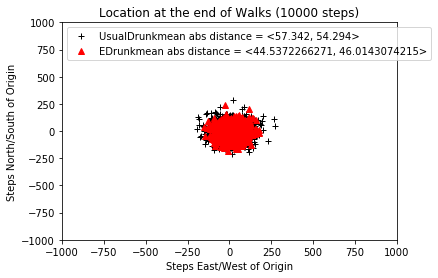

In [43]:
%matplotlib inline

# num_steps = (10,100,1000,10000)
# sim_all_viz((UsualDrunk,ColdDrunk), num_steps, 100)

random.seed(0)
plot_locs((UsualDrunk,EDrunk),10000,1000)

### Inferential Statistics

**Population: ** a set of examples <br>
**Sample: ** a proper subset of a population <br>
**Goal: ** Estimate some statistic about the population based on stats about the sample  <br>
**Key fact: ** If the sample is random, it tends to exhibit the same properties as the population from which it is drawn <br>
**Confidence: ** depends on (1) size of sample; (2) variance of sample; (3) as the variance grows, we need larger samples to have the same degree of confidence <br>
**Confidence Interval: ** provides a range that is likely to contain the unknown value and a confidence (level) that the unknown value lays within that range
**Empirical Rule: ** Assume (1) the mean estimation error is zero and (2) the distribution of the errors in the estimates is normal, then <br>
- ~68% of data within 1 std of $\mu$
- ~95% of data within 2 std of $\mu$
- ~99.7 of data within 3 std of $\mu$
    

In [3]:
import random

class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.blackOdds, self.redOdds = 1.0, 1.0
        self.pocketOdds = len(self.pockets) - 1.0
    def spin(self):
        self.ball = random.choice(self.pockets)
    def isBlack(self):
        if type(self.ball) != int:
            return False
        if (self.ball > 0 and self.ball <= 10) or \
            (self.ball > 18 and self.ball <= 28):
                return self.ball % 2 == 0
        else:
            return self.ball % 2 == 1
    def isRed(self):
        return type(self.ball) == int and not self.isBlack()
    def betBlack(self, amt):
        if self.isBlack():
            return amt * self.blackOdds
        else:
            return -amt * self.blackOdds
    def betRed(self, amt):
        if self.isRed():
            return amt * self.redOdds
        else:
            return -amt * self.redOdds
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt * self.pocketOdds
        else:
            return -amt
    def __str__(self):
        return 'Fair Rouette'

def playRoulette(game, numSpins, toPrint = True):
    luckyNumber = '2'
    bet = 1
    totRed, totBlack, totPocket = 0.0, 0.0, 0.0
    for i in range(numSpins):
        game.spin()
        totRed += game.betRed(bet)
        totBlack += game.betBlack(bet)
        totPocket += game.betPocket(luckyNumber, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting red = ' + str(100*totRed/numSpins) + '%')
        print('Expected return betting black = ' + str(100*totBlack/numSpins) + '%')
        print('Expected return betting ' + luckyNumber + ' = ' + str(100*totPocket/numSpins) + ' %\n')
    return (totRed/numSpins, totBlack/numSpins, totPocket/numSpins)

class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'

class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'
    
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, toPrint)
        pocketReturns.append(trialVals[2])
    return pocketReturns

random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (100, 1000, 10000, 100000):
    print('\nSimulate betting a pocket for', numTrials, 'trials of', numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials, numSpins, False)
        print('Exp. return for', G(), '=',
             str(100*sum(pocketReturns)/float(len(pocketReturns))) + '%')
def getMeanAndStd(X):
    mean = sum(X) / float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean) ** 2
    std = (tot/len(X)) ** 0.5
    return mean, std


Simulate betting a pocket for 20 trials of 100 spins each
Exp. return for Fair Rouette = 6.199999999999998%
Exp. return for European Roulette = -8.200000000000001%
Exp. return for American Roulette = 2.599999999999998%

Simulate betting a pocket for 20 trials of 1000 spins each
Exp. return for Fair Rouette = 4.760000000000002%
Exp. return for European Roulette = -2.4399999999999995%
Exp. return for American Roulette = -9.46%

Simulate betting a pocket for 20 trials of 10000 spins each
Exp. return for Fair Rouette = -1.3060000000000003%
Exp. return for European Roulette = -4.095999999999999%
Exp. return for American Roulette = -5.698000000000001%

Simulate betting a pocket for 20 trials of 100000 spins each
Exp. return for Fair Rouette = 0.7982%
Exp. return for European Roulette = -2.5876000000000006%
Exp. return for American Roulette = -5.134600000000001%


In [4]:
numSpins = 1000000
game = FairRoulette()
playRoulette(game, numSpins)

1000000 spins of Fair Rouette
Expected return betting red = -0.0222%
Expected return betting black = 0.0222%
Expected return betting 2 = 0.1592 %



(-0.000222, 0.000222, 0.001592)

In [1]:
import math
L = [10,4,12,15,20,5]
mean = sum(L) / len(L)
std = math.sqrt(sum([(x-mean) ** 2 for x in L])/len(L))

std / mean


0.5034317492677621

In [5]:
import numpy as np

def noReplacementSimulation(numTrials):
    '''
    Runs numTrials trials of a Monte Carlo simulation
    of drawing 3 balls out of a bucket containing
    3 red and 3 green balls. Balls are not replaced once
    drawn. Returns the a decimal - the fraction of times 3 
    balls of the same color were drawn.
    '''
    result = 0
    for _ in range(numTrials):
        balls = [1,1,1,0,0,0]
        balls_chosen = [-1] * 3
        for i in range(3):
            balls_chosen[i] = np.random.choice(balls, replace=False)
        if balls_chosen[0] == balls_chosen[1] and balls_chosen[1] == balls_chosen[2]:
            result += 1
    return result / numTrials

numTrials = [10,100,1000,10000,100000]
for num in numTrials:
    print(noReplacementSimulation(num))

0.2
0.16
0.265
0.2474
0.25019


### Sampling

Mean of SAMPLE MEANS =  16.282
Standard Deviation of SAMPLE MEANS =  0.662
Standard Deviation of Population =  9.4375585448
Maximum difference in means = 2.52
Maximum difference in sd =  1.281


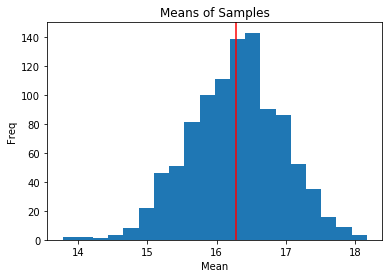

In [19]:
import random, pylab
import numpy as np

%matplotlib inline

def make_hist(data, title, xlabel, ylabel, bins = 20):
    pylab.hist(data, bins=bins)
    pylab.title(title)
    pylab.xlabel(xlabel)
    pylab.ylabel(ylabel)
    
def get_highs():
    in_file = open('./asset-lecture9-segment1/temperatures.csv')
    population = []
    for line in in_file:
        try:
            temp_c = float(line.split(',')[1])
            population.append(temp_c)
        except:
            continue
    return population

def get_means_and_sds(population, sample, verbose=False):
    population_mean = sum(population) / len(population)
    sample_mean = sum(sample) / len(sample)
    if verbose:
        make_hist(population, 'Daily High 1961-2015, Population\n' + \
                 '(mean = ' + str(round(population_mean,2)) + ')',\
                 'Degrees C', 'Number Days')
        pylab.axvline(x=population_mean, color='r')
        
        pylab.figure()
        make_hist(sample, 'Daily High 1961-2015, Population\n' + \
                 '(mean = ' + str(round(sample_mean,2)) + ')',\
                 'Degrees C', 'Number Days')
        pylab.axvline(x=sample_mean, color='r')
        
        print('Population mean = ', population_mean)
        print('Standard deviation of population = ', np.std(population))
        print('Sample mean = ', sample_mean)
        print('Standard deviation of sample =', np.std(sample))
    return population_mean, sample_mean, np.std(population), np.std(sample)

random.seed(0)
population = get_highs()
sample_size = 200
num_samples = 1000
max_mean_diff, max_sd_diff = 0, 0
sample_means = []

for _ in range(num_samples):
    sample = random.sample(population,sample_size)
    pop_mean, samp_mean, pop_sd, samp_sd = get_means_and_sds(population, sample, False)
    sample_means.append(samp_mean)
    if abs(pop_mean - samp_mean) > max_mean_diff:
        max_mean_diff = abs(pop_mean - samp_mean)
    if abs(pop_sd - samp_sd) > max_sd_diff:
        max_sd_diff = abs(pop_sd - samp_sd)
print('Mean of SAMPLE MEANS = ', round(sum(sample_means)/len(sample_means),3))
print('Standard Deviation of SAMPLE MEANS = ', round(np.std(sample_means),3))
print('Standard Deviation of Population = ', pop_sd)
print('Maximum difference in means =', round(max_mean_diff,3))
print('Maximum difference in sd = ', round(max_sd_diff,3))
make_hist(sample_means, 'Means of Samples', 'Mean', 'Freq')
pylab.axvline(x=sum(sample_means)/len(sample_means), color='r')

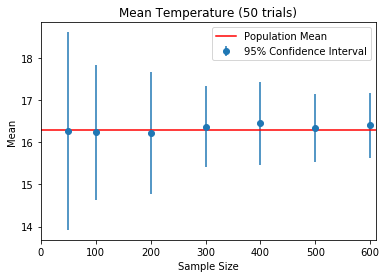

In [13]:
def show_error_bars(population, sizes, num_trials):
    x_vals = []
    size_means, size_sds = [], []
    for sample_size in sizes:
        x_vals.append(sample_size)
        trial_means = []
        for t in range(num_trials):
            sample = random.sample(population, sample_size)
            pop_mean, samp_mean, pop_sd, samp_sd = get_means_and_sds(population, sample)
            trial_means.append(samp_mean)
        size_means.append(sum(trial_means) / len(trial_means))
        size_sds.append(np.std(trial_means))
    pylab.errorbar(x_vals, size_means, yerr=1.96*pylab.array(size_sds), fmt='o',\
                  label='95% Confidence Interval')
    pylab.title('Mean Temperature (' + str(num_trials) + ' trials)')
    pylab.xlabel('Sample Size')
    pylab.ylabel('Mean')

    pylab.axhline(y=pop_mean,color='r',label='Population Mean')
    pylab.xlim(0, sizes[-1] + 10)
    pylab.legend()
    pylab.figure()
    
show_error_bars(population, (50, 100, 200, 300, 400, 500, 600), 50)

### Dynamic Programming

#### fibnacci

In [39]:
def fastFib(x, memo = {}):
    if x == 0 or x == 1:
        memo[0],memo[1] = 1,1
        result = 1
    elif x in memo:
        result = memo[x]
    else:
        result = fastFib(x-1, memo) + fastFib(x-2, memo)
        memo[x] = result
    return result

In [40]:
print(fastFib(100))

573147844013817084101


#### 0/1 knapsack problem

In [4]:
class Item:
    def __init__(self, name, val, weight):
        self.name = name
        self.val = val
        self.weight = weight
    def get_weight(self):
        return self.weight
    def get_value(self):
        return self.val
    def __str__(self):
        return "<" + str(self.name) + ", " + str(float(self.val)) + ", " + str(float(self.weight)) + ">"

def max_val(to_consider, avail):
    if to_consider == [] or avail == 0:
        result = (0,())
    elif to_consider[0].get_weight() > avail:
        result = max_val(to_consider[1:], avail)
    else:
        next_item = to_consider[0]
        
        with_val, with_to_take = max_val(to_consider[1:], avail-next_item.get_weight())
        with_val += next_item.get_value()
        
        without_val, without_to_take = max_val(to_consider[1:], avail)
        
        if with_val > without_val:
            result = (with_val, with_to_take + (next_item,))
        else:
            result = (without_val, without_to_take)
    return result

In [18]:
def small_test():
    names = ['a','b','c','d']
    vals = [6,7,8,9]
    weights = [3,2,3,5]
    Items = []
    for i in range(len(vals)):
        Items.append(Item(names[i], vals[i], weights[i]))
    val, taken = fast_max_val(Items, 5)
    print(type(taken))
    for item in taken:
        print(item)
    print('Total value of items taken = ' + str(val))

In [21]:
small_test()

<class 'tuple'>
<c, 8.0, 3.0>
<b, 7.0, 2.0>
Total value of items taken = 15


In [20]:
def fast_max_val(to_consider, avail, memo = {}):
    if (len(to_consider),avail) in memo:
        result = memo[(len(to_consider),avail)]
    elif to_consider == [] or avail == 0:
        result = (0,())
    elif to_consider[0].get_weight() > avail:
        result = fast_max_val(to_consider[1:], avail, memo)
    else:
        item = to_consider[0]
        with_val, with_to_take = fast_max_val(to_consider[1:], avail - item.get_weight(), memo)
        with_val += item.get_value()
        
        without_val, without_to_take = fast_max_val(to_consider[1:], avail, memo)
        
        if with_val > without_val:
            result = (with_val, with_to_take + (item,))
        else:
            result = (without_val, without_to_take)
    memo[(len(to_consider),avail)] = result
    return result

In [1]:
def f(x):
    # x is an integer
    return int(x + random.choice([0.25, 0.5, 0.75]))

In [36]:
# import random
# for _ in range(10):
#     print(f(0))

In [5]:
import random

def A():
    mylist = []
    r = 1

    if random.random() > 0.99:
        r = random.randint(1, 10)
    for i in range(r):
        random.seed(0)
        if random.randint(1, 10) > 3:
            number = random.randint(1, 10)
            mylist.append(number)
    print(mylist)

In [30]:
import numpy as np
def greedySum(L, s):
    """ input: s, positive integer, what the sum should add up to
               L, list of unique positive integers sorted in descending order
        Use the greedy approach where you find the largest multiplier for 
        the largest value in L then for the second largest, and so on to 
        solve the equation s = L[0]*m_0 + L[1]*m_1 + ... + L[n-1]*m_(n-1)
        return: the sum of the multipliers or "no solution" if greedy approach does 
                not yield a set of multipliers such that the equation sums to 's'
    """
    m = []
    residue = s
    for e in L:
        tmp = residue // e
        residue -= tmp * e
        m += [tmp]
    if sum(np.multiply(m, L)) != s:
        return "no solution"
    else:
        return sum(m)

In [32]:
print(greedySum([10,5,1],14))

5


In [33]:
def max_contig_sum(L):
    """ L, a list of integers, at least one positive
    Returns the maximum sum of a contiguous subsequence in L """
    all_contig_sum = []
    for i in range(len(L)):
        sub_contig_sum = []
        for j in range(i,len(L)):
            tmp_sum = sum(L[i:j+1])
            sub_contig_sum.append(tmp_sum)
        all_contig_sum.append(max(sub_contig_sum))
    return max(all_contig_sum)
    

In [35]:
L = [3,4,-8,15,-1,2]
print(max_contig_sum(L))

16


In [45]:
def solveit(test):
    """ test, a function that takes an int parameter and returns a Boolean
        Assumes there exists an int, x, such that test(x) is True
        Returns an int, x, with the smallest absolute value such that test(x) is True 
        In case of ties, return any one of them. 
    """
    # IMPLEMENT THIS FUNCTION
    x = 0
    while True:
        if test(x):
            return x
        elif test(-x):
            return -x
        else:
            x += 1

#### This test case prints 49 ####
def f(x):
    return (x+15)**0.5 + x**0.5 == 15
print(solveit(f))

#### This test case prints 0 ####
def f(x):
    return x == 0
print(solveit(f))

49
0
